In [1]:
# 1. GET request

import requests

################################################################################################
def get_bus_route_info(company_id, route):
    url = f"https://rt.data.gov.hk/v2/transport/citybus/route/{company_id}/{route}"
    response = requests.get(url)
    data = response.json()
    return data

# 调用函数获取A28公交线路信息
company_id = "CTB"
route = "A28"
route_info = get_bus_route_info(company_id, route)

# 打印结果
print(route_info)


{'type': 'Route', 'version': '2.0', 'generated_timestamp': '2024-03-10T19:20:32+08:00', 'data': {'co': 'CTB', 'route': 'A28', 'orig_tc': '日出康城', 'orig_en': 'LOHAS Park', 'dest_tc': '機場 (經港珠澳大橋香港口岸)', 'dest_en': 'Airport (via HZMB Hong Kong Port)', 'orig_sc': '日出康城', 'dest_sc': '机场 (经港珠澳大桥香港口岸)', 'data_timestamp': '2024-03-10T05:00:02+08:00'}}


In [2]:
################################################################################################

def get_bus_route_stop_info(company_id, route, direction):
    url = f"https://rt.data.gov.hk/v2/transport/citybus/route-stop/{company_id}/{route}/{direction}"
    response = requests.get(url)
    data = response.json()
    return data

# 调用函数获取A28公交线路进站方向站点信息
company_id = "CTB"
route = "A28"
direction = "inbound"
route_stop_info = get_bus_route_stop_info(company_id, route, direction)

# 打印结果
print(route_stop_info)

# 提取站点信息并保存在列表中
stops = [entry['stop'] for entry in route_stop_info['data']]

# 打印站点信息列表
print(stops)


{'type': 'RouteStop', 'version': '2.0', 'generated_timestamp': '2024-03-10T19:19:14+08:00', 'data': [{'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 1, 'stop': '001837', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 2, 'stop': '002672', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 3, 'stop': '003304', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 4, 'stop': '003482', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 5, 'stop': '003540', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 6, 'stop': '001854', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 7, 'stop': '001766', 'data_timestamp': '2024-03-10T05:00:30+08:00'}, {'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 8, 'stop': '001523', 'da

In [3]:
################################################################################################
import pandas as pd

def get_stop_name(stop_id):
    url = f"https://rt.data.gov.hk/v2/transport/citybus/stop/{stop_id}"
    response = requests.get(url)
    data = response.json()
    return data

# 站点ID列表
stop_ids = ['001837', '002672', '003304', '003482', '003540', '001854', '001766', '001523', '001688', '001696', '001697', '001653', '001652', '001780', '001788', '003498', '003499', '003500', '002701', '003068', '002705', '001677', '001678', '003234', '001823', '001763', '001764', '001824', '001825', '001826', '003160', '003225', '002919', '002928', '002929', '003329']

# 创建一个空的列表
data = []

# 遍历每个站点ID，获取对应的name_tc，并添加到列表中
for stop_id in stop_ids:
    stop_info = get_stop_name(stop_id)
    name_tc = stop_info['data']['name_tc']
    data.append({'stop_id': stop_id, 'name_tc': name_tc})

# 创建DataFrame
df = pd.DataFrame(data)

# 打印数据集
print(df)


   stop_id          name_tc
0   001837      機場 (地面運輸中心)
1   002672       機場博覽館, 航展道
2   003304  香港天際萬豪酒店, 航天城東路
3   003482    航天城交匯處, 航天城東路
4   003540        港珠澳大橋香港口岸
5   001854        青嶼幹線巴士轉乘站
6   001766       畢架山花園, 龍翔道
7   001523        黃大仙站, 龍翔道
8   001688        沙田坳道, 龍翔道
9   001696        鑽石山站, 大磡道
10  001697        牛池灣村, 龍翔道
11  001653      牛池灣街市, 清水灣道
12  001652    彩雲邨白虹樓, 新清水灣道
13  001780      基順學校, 新清水灣道
14  001788       順利消防局, 利安道
15  003498         安泰邨, 安秀道
16  003499      安達邨愛達樓, 安秀道
17  003500         安達邨, 安秀道
18  002701         寶達邨, 寶琳路
19  003068              寶達邨
20  002705        馬游塘村, 寶琳路
21  001677       康盛花園, 寶琳北路
22  001678        翠林邨, 寶琳北路
23  003234        富麗花園, 寶康路
24  001823       唐明街公園, 唐明街
25  001763      彩明苑彩富閣, 景嶺路
26  001764        調景嶺站, 景嶺路
27  001824       將軍澳中心, 寶邑路
28  001825        將軍澳站, 寶邑路
29  001826       將軍澳廣場, 寶邑路
30  003160        蓬萊路, 環保大道
31  003225        百勝角, 環保大道
32  002919         峻瀅, 環保大道
33  002928     日出康城領都, 環保大道
34  002929     日出康城首

In [4]:
################################################################################################

stop_name = "將軍澳站, 寶邑路"
direction = "inbound"

# 根据条件筛选DataFrame
filtered_df = df[(df['name_tc'] == stop_name)]

# 获取匹配的stop_id
stop_id = filtered_df['stop_id'].values[0]

# 打印stop_id
print(stop_id)


001825


In [5]:
################################################################################################

def get_eta(company_id, stop_id, route):
    url = f"https://rt.data.gov.hk/v2/transport/citybus/eta/{company_id}/{stop_id}/{route}"  # 替换为ETA API的URL
    response = requests.get(url)
    data = response.json()
    return data

company_id = "CTB"
route = "A28"
stop_id = "001825"

eta_data = get_eta(company_id, stop_id, route)

print(eta_data)

# 提取数据字段
company_id = eta_data['data'][0]['co']
route = eta_data['data'][0]['route']
direction = eta_data['data'][0]['dir']
stop_id = eta_data['data'][0]['stop']
destination = eta_data['data'][0]['dest_tc']
eta = eta_data['data'][0]['eta']

# 创建数据集（DataFrame）
data = {'公司ID': [company_id], '路线': [route], '方向': [direction],
        '停靠站ID': [stop_id], '目的地': [destination], '预计到达时间': [eta]}
df = pd.DataFrame(data)

# 打印数据集（DataFrame）
print(df)


{'type': 'ETA', 'version': '2.0', 'generated_timestamp': '2024-03-10T19:21:10+08:00', 'data': [{'co': 'CTB', 'route': 'A28', 'dir': 'I', 'seq': 26, 'stop': '001825', 'dest_tc': '日出康城', 'dest_en': 'LOHAS Park', 'eta': '2024-03-10T19:48:06+08:00', 'rmk_tc': '', 'eta_seq': 1, 'dest_sc': '日出康城', 'rmk_en': '', 'rmk_sc': '', 'data_timestamp': '2024-03-10T19:20:13+08:00'}]}
  公司ID   路线 方向   停靠站ID   目的地                     预计到达时间
0  CTB  A28  I  001825  日出康城  2024-03-10T19:48:06+08:00


In [6]:
################################################################################################
# 2. POST request

from openai import AzureOpenAI

client = AzureOpenAI(
    api_key="63d53d8ef5074a17ac71f85bd7de1fd0",
    api_version="2023-05-15",
    azure_endpoint="https://hkust.azure-api.net"
)

response = client.chat.completions.create(
    model="gpt-35-turbo",
    messages=[
        {"role":"system","content": "You are a helpful assistant."},
        {"role":"user","content": "what is openAI?"},
    ],
)

print(response.choices[0].message.content)

response = client.chat.completions.create(
    model="gpt-35-turbo",
    messages=[
        {"role":"system","content": "You are a helpful assistant."},
        {"role":"user","content": "what is Virtual Youtuber?"},
    ],
)

print(response.choices[0].message.content)


OpenAI is an artificial intelligence research laboratory consisting of the for-profit corporation OpenAI LP and its parent company, the non-profit OpenAI Inc. They were founded with the purpose of advancing friendly AI for the benefit of humanity. OpenAI conducts research in several areas of AI including deep learning, natural language processing, and robotics, among others. They have also developed several notable AI systems, such as the language model GPT-3 and the reinforcement learning system OpenAI Five.
A virtual YouTuber, or VTuber for short, refers to a YouTuber who presents themselves as a virtual character or avatar. This could include anime-style characters, animals, robots, and more. The character is often controlled by a human operator who speaks into a microphone to provide commentary, answer questions, and interact with viewers. VTubers have become increasingly popular in recent years, particularly in Japan, where they are known as "Virtual YouTubers" or "VTubers" for sh

['44', '40', '34', '35', '43', '43', '44', '45', '46', '29', '33', '34', '34', '33', '27', '30', '29', '40', '31', '39', '30', '28', '32', '25', '34', '27', '26', '29', '28', '38', '29', '34', '29', '34', '31', '35', '30', '31', '35', '28', '34', '30', '31', '39', '38', '25', '26', '36', '26', '30', '31', '31', '32', '33', '34', '35', '24', '25', '28', '23', '29', '23', '24', '25', '26', '29', '30', '31', '32', '33', '34', '35', '24', '25', '26']


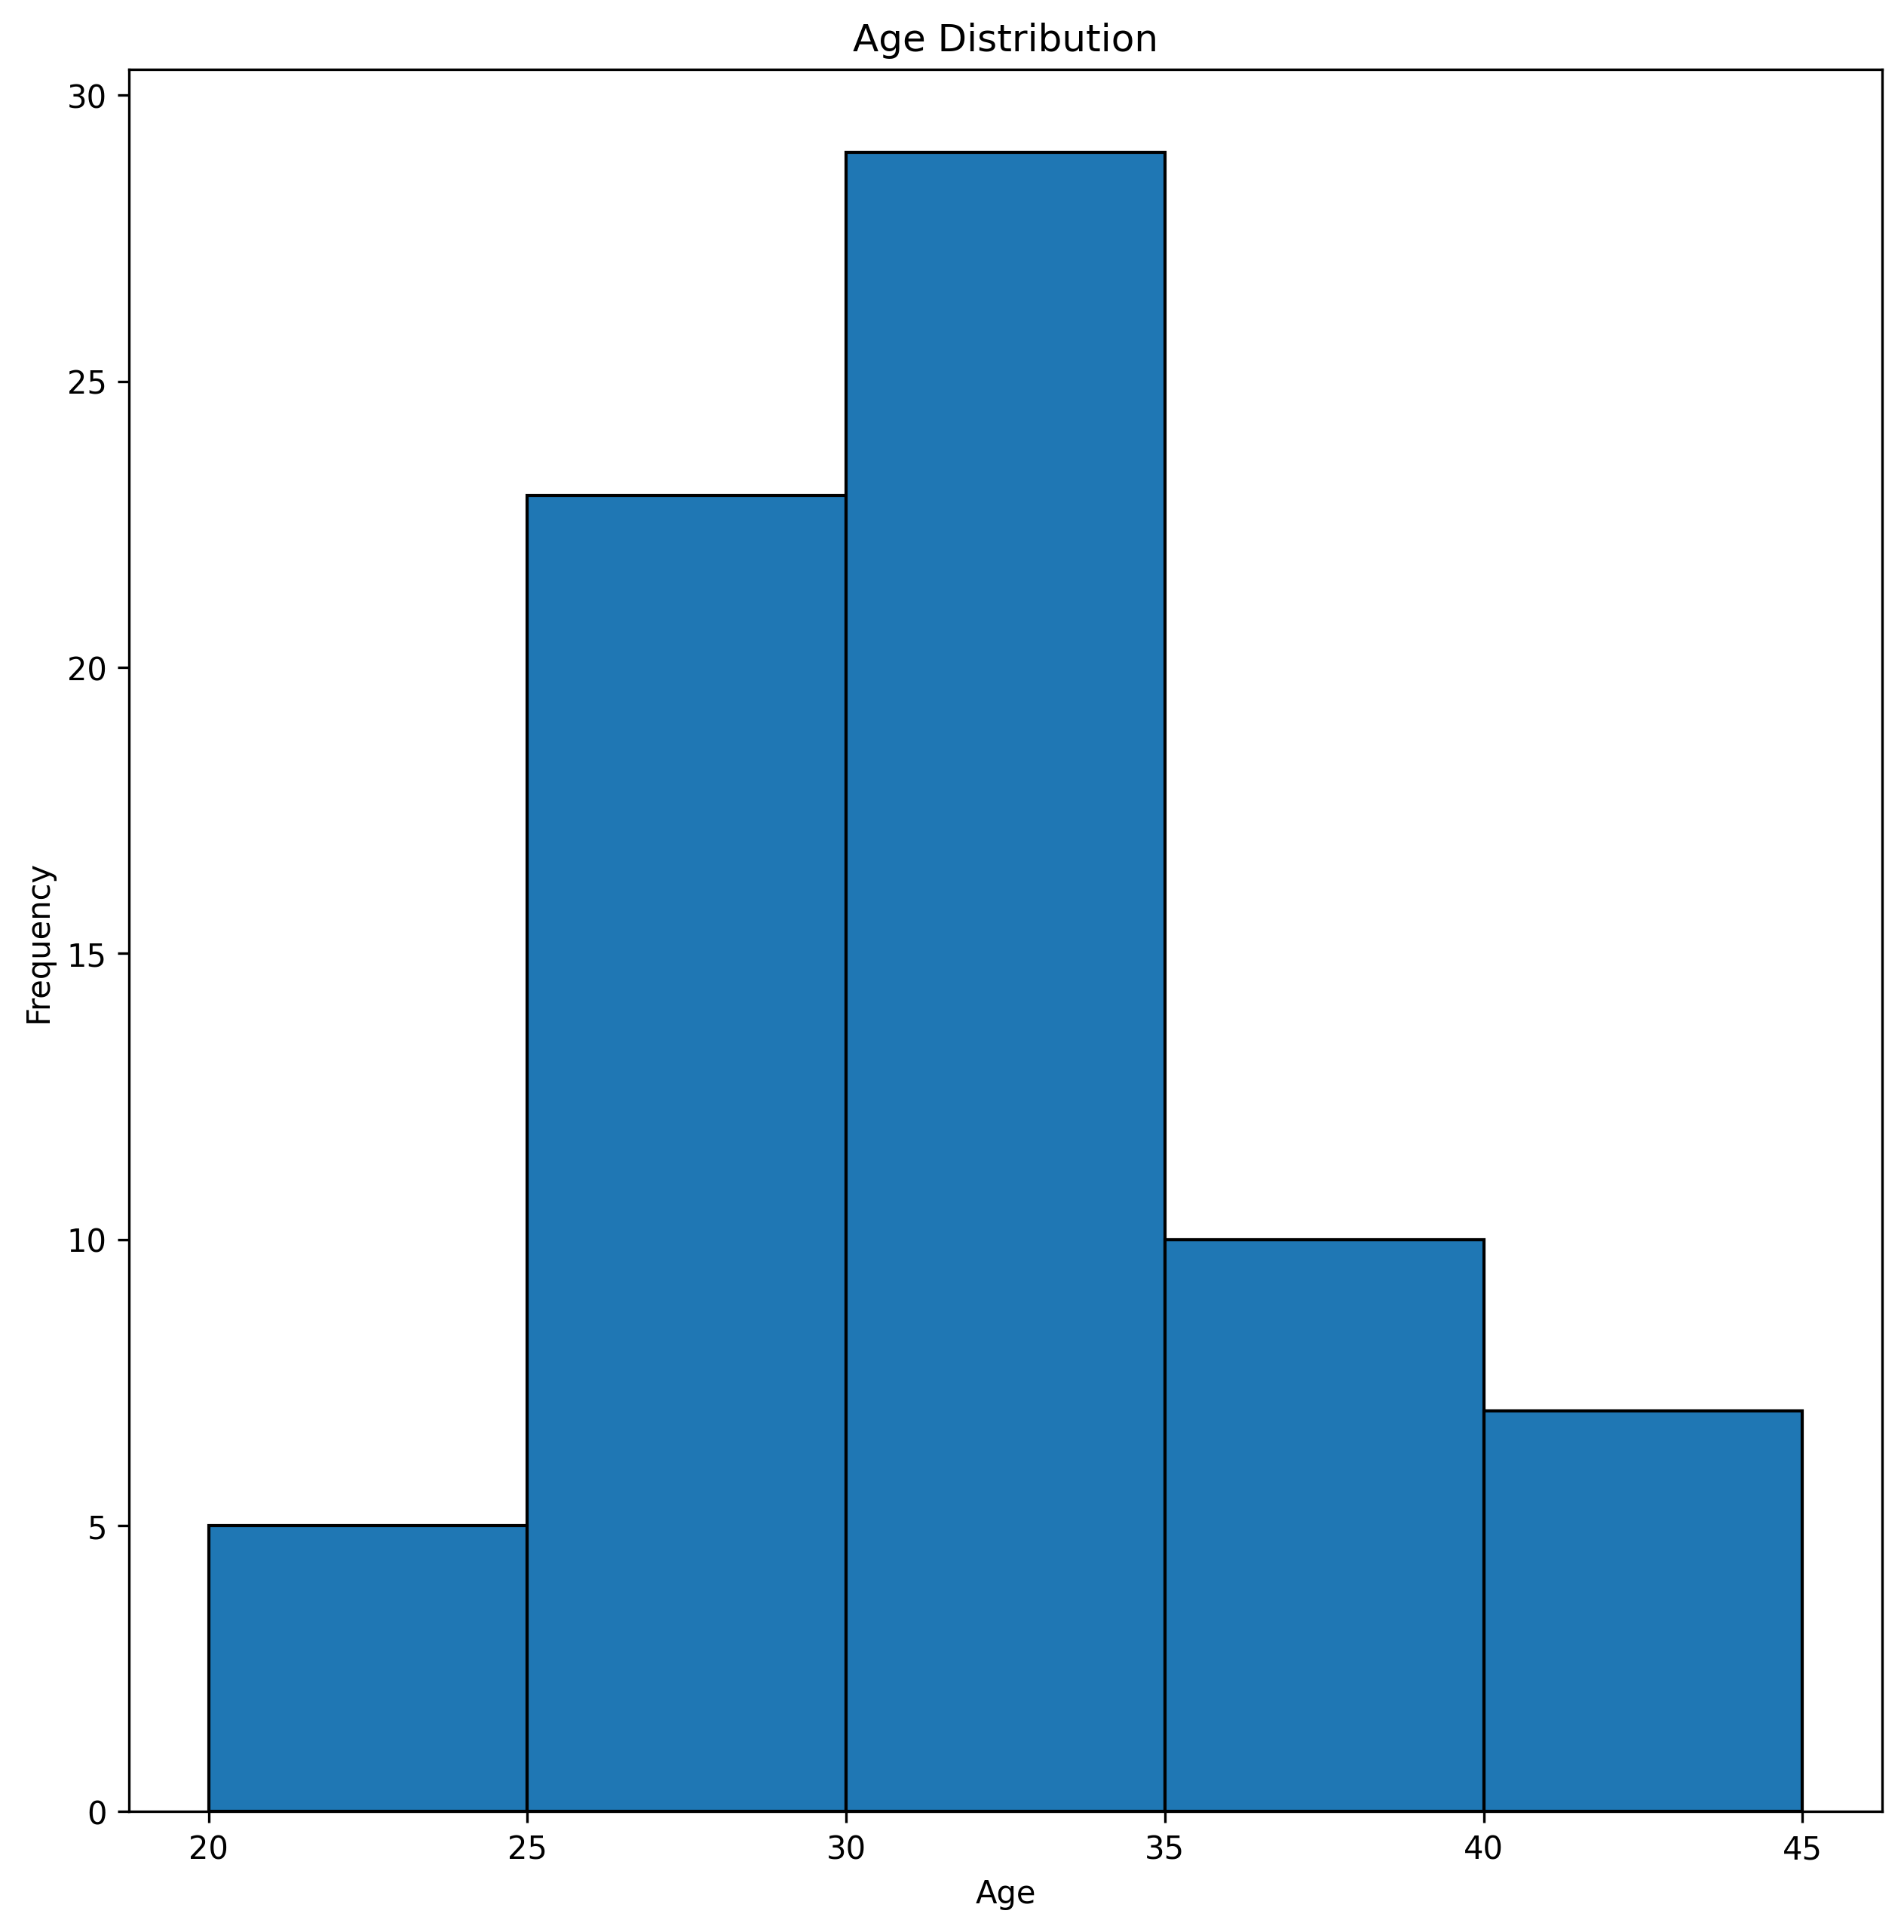

['83.333', '86.111', '100.00', '95.833', '93.333', '88.889', '66.667', '66.667', '88.889', '77.778', '68.889', '89.583', '75.556', '93.333', '100.00', '74.074', '100.00', '93.333', '62.963', '53.333', '77.778', '45.455', '76.543', '67.778', '60.684', '47.009', '59.722', '54.762', '53.333', '50.794', '70.833', '74.444', '50.505', '44.444', '59.596', '72.727', '73.737', '72.727', '73.737', '90.909', '76.768', '78.788', '61.935', '67.500', '61.875', '57.500', '60.000', '60.625', '47.647', '62.500', '47.500', '63.529', '72.353', '84.706', '58.125', '82.222', '70.000', '74.444', '64.706', '54.444', '57.576', '53.895', '82.526', '56.200', '83.579', '76.800', '80.211', '73.333', '72.600', '77.714', '75.641', '78.507', '69.692', '76.174', '92.742']


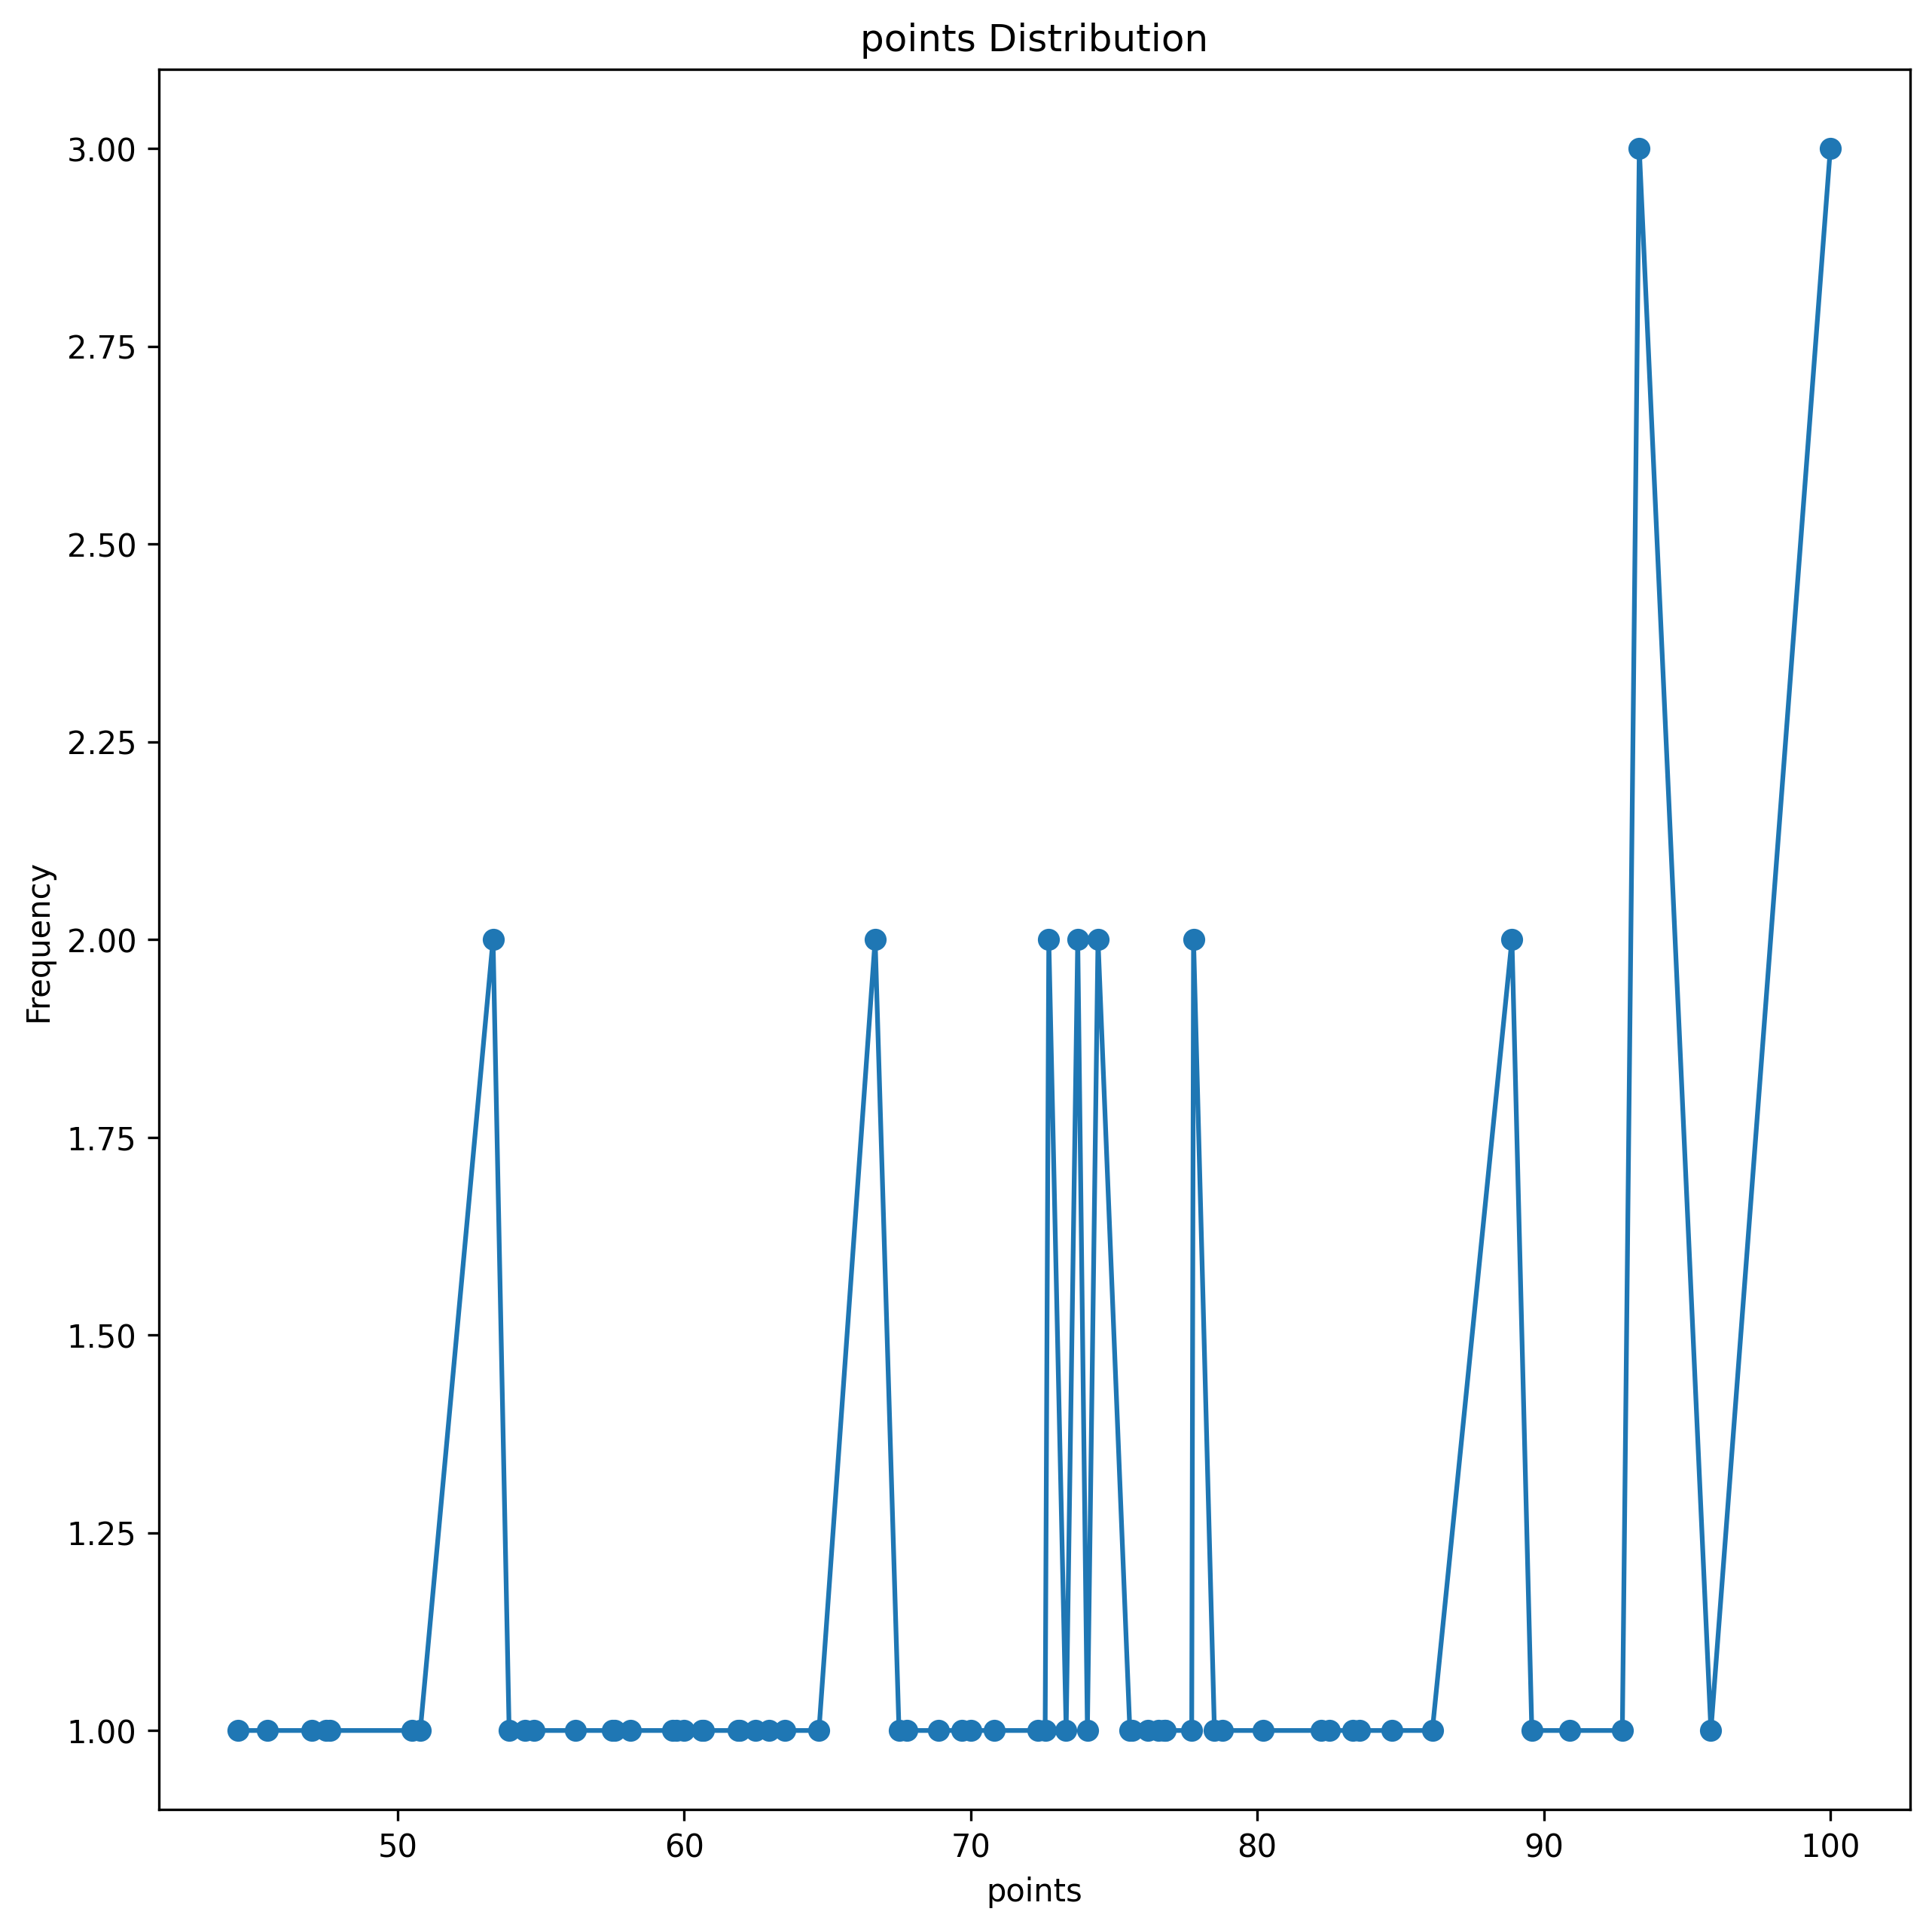

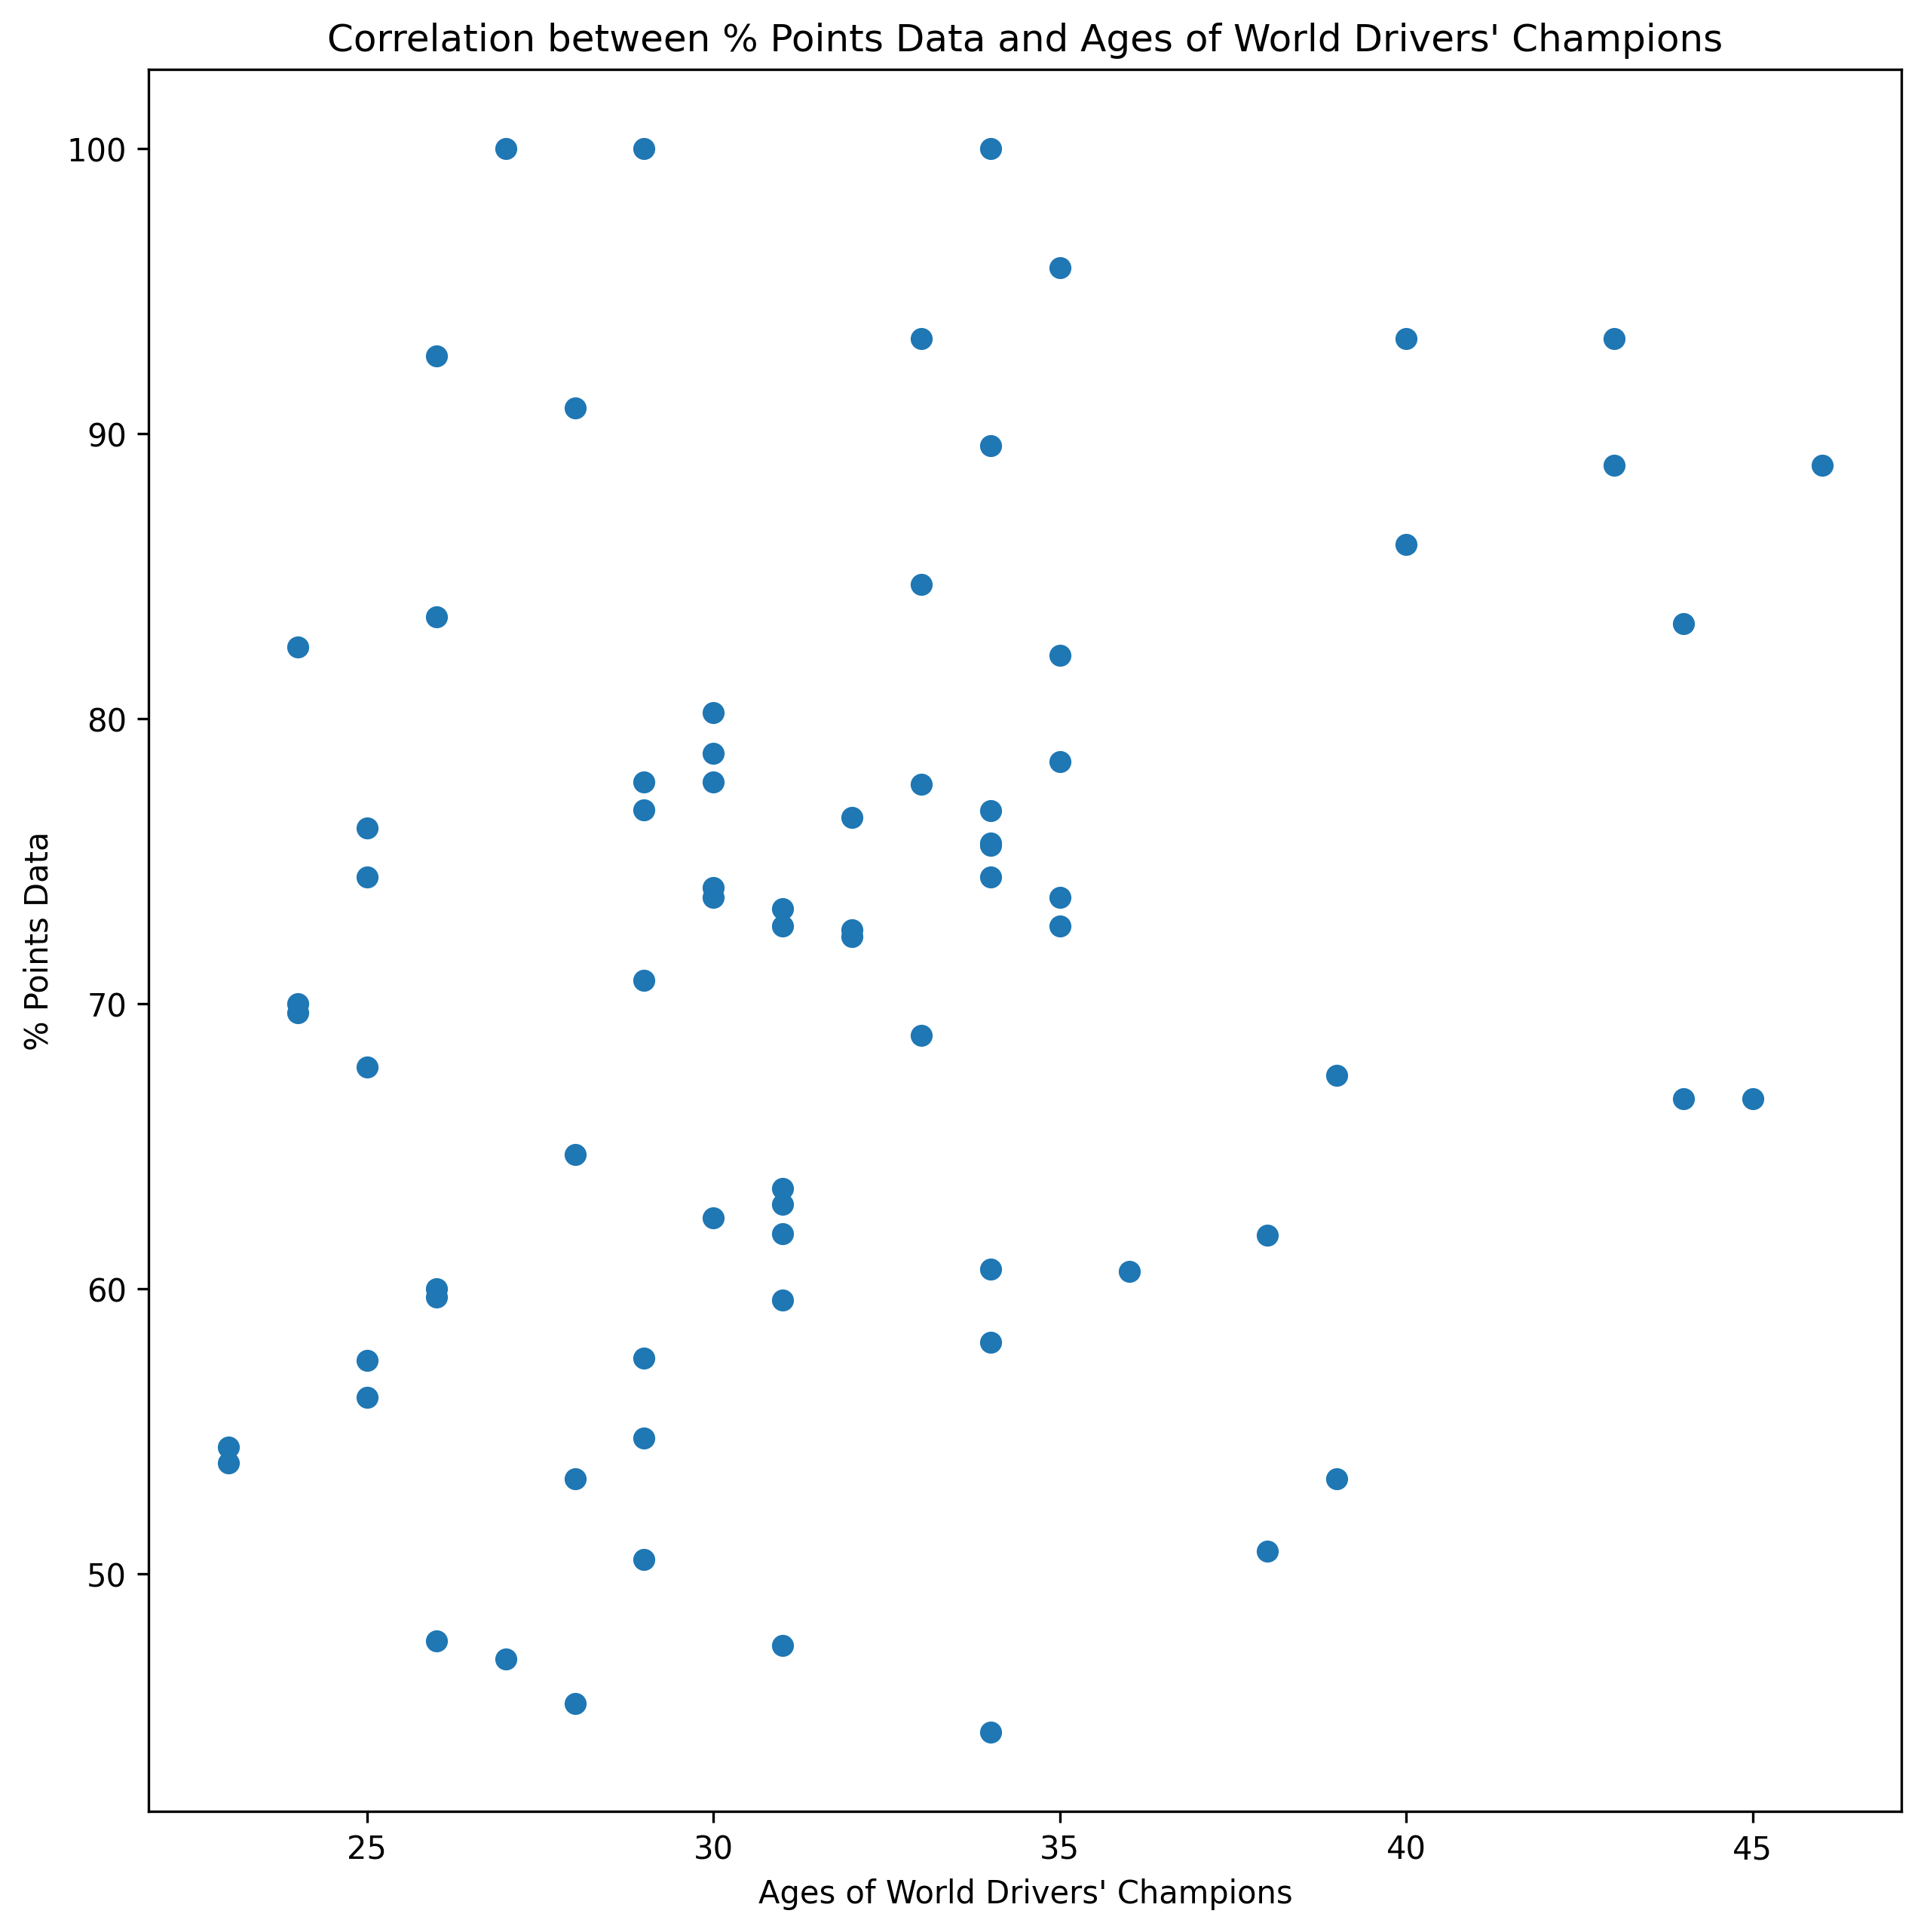

In [7]:
################################################################################################
# 3. Web Scraping
import numpy as np
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

url = f"https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions"

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

ser = Service(r'D:\app\chromedriver\chromedriver.exe')
options = Options()
options.add_argument("headless")              # headless is the option to whether to have a browser popping out
driver = webdriver.Chrome(service=ser, options=options)
driver.get(url)

elements = driver.find_elements(By.XPATH, '//table[@class="wikitable sortable jquery-tablesorter"][@style="font-size:85%; text-align:center;"]/tbody/tr[position() >= 1 and position() <= last()]/td[position() = 3]')
data_list1 = [element.text for element in elements]
data_list1[5]='43'
print(data_list1)

data_list1 = [int(age) if age.isdigit() else 0 for age in data_list1]
mean_age = np.mean(data_list1)

import matplotlib.pyplot as plt
# Create a bar chart to display the age distribution
fig = plt.figure(figsize=(10,10), dpi=300)
plt.hist(data_list1, bins=range(20, 50, 5), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


#####################################################################
elements = driver.find_elements(By.XPATH, '//table[@class="wikitable sortable jquery-tablesorter"][@style="font-size:85%; text-align:center;"]/tbody/tr[position() >= 1 and position() <= last()]/td[position() = 12]')
data_list2 = [element.text for element in elements]
data_list2.insert(6, '66.667 (45.833)')

for i in range(len(data_list2)):
    data_list2[i] = data_list2[i][:6]

print(data_list2)

data_list2 = [float(points) for points in data_list2]

points_counts = {points: data_list2.count(points) for points in set(data_list2)}
sorted_points = sorted(points_counts.keys())
freq = [points_counts[points] for points in sorted_points]

# Construct a line chart to depict the distribution
fig = plt.figure(figsize=(10,10), dpi=300)
plt.plot(sorted_points, freq, marker='o')
plt.xlabel('points')
plt.ylabel('Frequency')
plt.title('points Distribution')
plt.show()

#####################################################################
fig = plt.figure(figsize=(10,10), dpi=300)
plt.scatter(data_list1, data_list2)
plt.xlabel("Ages of World Drivers' Champions")
plt.ylabel("% Points Data")
plt.title("Correlation between % Points Data and Ages of World Drivers' Champions")
plt.show()